**Pre-processing UW14 with scVelo**

1.   Install required libraries and load Data
2.   Create velocity vectors and kernel






In [ ]:
#!pip install numpy==1.21.6 pandas==1.5.3 matplotlib===3.5.0 scanpy==1.9.1 igraph==0.9.8 scvelo==0.2.4 loompy==3.0.6 anndata==0.8.0

In [1]:
!pip install kaleido cohere openai tiktoken scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 42.4 MB/s eta 0:00:00


In [2]:
!pip install numpy==1.26.0 pandas==2.2.2 matplotlib===3.8.2 scanpy igraph==0.10 scvelo loompy anndata numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 353.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.8/196.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.2 MB/s eta 0:00:00
  Created wheel for loompy: filename=loompy-3.0.8-py3-none-any.whl size=54012 sha256=340cedab48ad09c81d3e7470e24989da240652aa31863bcb8790b60664fe3bf3
  Stored in director

In [3]:
!pip install leidenalg tensorflow louvain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.7 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/bioinfo-ibms-pumc/SCSA.git
!pip install scipy openpyxl

Cloning into 'SCSA'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 187 (delta 32), reused 43 (delta 18), pack-reused 123
Receiving objects: 100% (187/187), 37.53 MiB | 28.03 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [4]:
import sys

if "google.colab" in sys.modules:
    !pip install -q git+https://github.com/theislab/cellrank

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 8.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import igraph
import scvelo as scv
import loompy as lmp
import anndata

import warnings
warnings.filterwarnings('ignore')

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [3]:
adata = sc.read('/content/drive/MyDrive/Colab Notebooks/uw14R_RNA.loom', cache=True)

# Merge velocyto and cellranger outputs
#Neutro3p = scv.utils.merge(Neutro3p, VelNeutro3p)
#/content/RNA.loom
adata

... writing an h5ad cache file to speedup reading next time


AnnData object with n_obs × n_vars = 3327 × 33538
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [4]:
sam_meta = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/metadata_conv_uw14_r_RNAvel.txt", sep='\t')

In [5]:
sam_meta2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/metadata_conv_uw14_r_RNAvel_all.txt", sep='\t')

In [6]:
sam_meta2['Celltype'].unique()

array(['CC_Neuron', 'GC-like', 'CC_dGSC', 'dGSC_Neuron',
       'CC_endothelial cell', 'CC_Stem cell', 'dGSC_Oligodendrocyte',
       'CC_microglial', 'CC_astrocyte', 'CC_oligodendrocyte', 'TC_4',
       'dGSC'], dtype=object)

In [7]:
adata.obs['cellT_seurat'] = sam_meta2['Celltype']
adata.obs['Condition'] = sam_meta['GROUP_time']
adata.obs['cell_state'] = sam_meta['State']

In [8]:
uw14R_seurat = sc.read("/content/drive/MyDrive/Colab Notebooks/UW14R_seurat2.h5ad")
uw14R_seurat

AnnData object with n_obs × n_vars = 1666 × 9947
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.3', 'seurat_clusters', 'GROUP_time', 'State', 'Celltype'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'

In [9]:
adata_new = adata[uw14R_seurat.obs_names.intersection(adata.obs_names),]

In [10]:
adata_new.obs['seurat_clusters'] = uw14R_seurat.obs['seurat_clusters']
adata_new.obsm['X_umap'] = uw14R_seurat.obsm['X_umap']

In [11]:
sc.pp.filter_cells(adata_new, min_genes=100)
sc.pp.filter_genes(adata_new, min_cells= 3)

filtered out 20470 genes that are detected in less than 3 cells


In [12]:
adata_new.var['mt'] = adata_new.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_new, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [13]:
adata_new = adata_new[adata_new.obs.pct_counts_mt < 15, :]
adata_new

View of AnnData object with n_obs × n_vars = 1647 × 13068
    obs: 'cellT_seurat', 'Condition', 'cell_state', 'seurat_clusters', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_umap'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [14]:
keep = (adata_new.obs['n_genes_by_counts'] < 7000) & (adata_new.obs['n_genes_by_counts'] > 100)
adata_new = adata_new[keep, :]
print("Remaining cells %d"%adata_new.n_obs)

Remaining cells 1647


In [15]:
sc.pp.normalize_total(adata_new, target_sum=1e4)
sc.pp.log1p(adata_new)

normalizing counts per cell
    finished (0:00:03)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


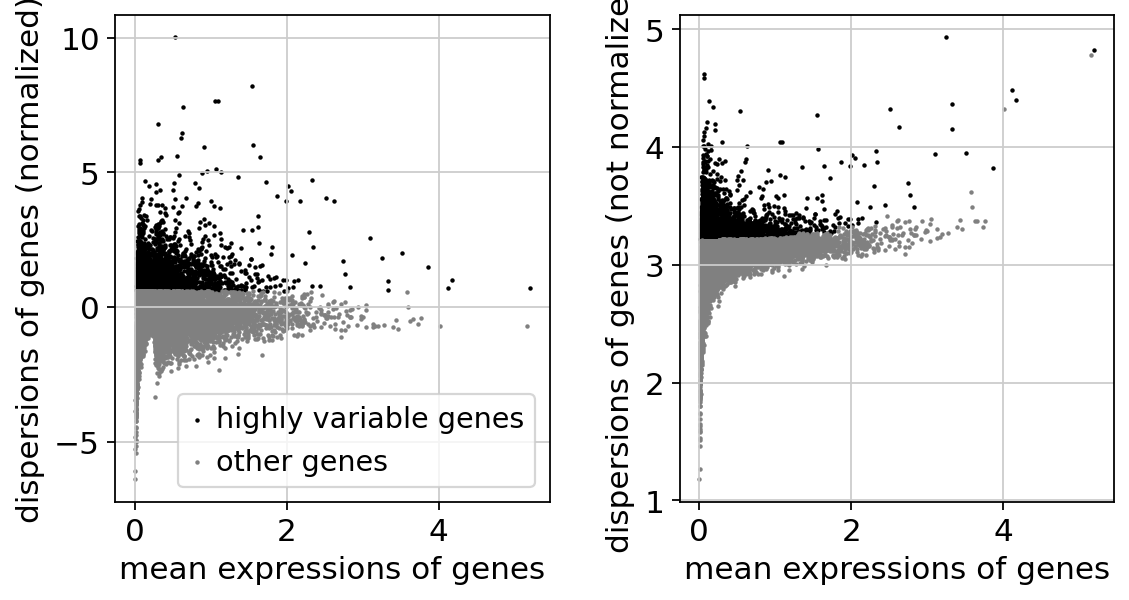

In [16]:
sc.pp.highly_variable_genes(adata_new, min_mean=0.0125, max_mean=3, min_disp=0.5, n_top_genes=3000)
sc.pl.highly_variable_genes(adata_new)

In [17]:
adata_new = adata_new[:, adata_new.var['highly_variable']]
adata_new

View of AnnData object with n_obs × n_vars = 1647 × 3000
    obs: 'cellT_seurat', 'Condition', 'cell_state', 'seurat_clusters', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_umap'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [18]:
sc.pp.regress_out(adata_new, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata_new, max_value=10)
#sc.tl.pca(adata_new, svd_solver='arpack')

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:03)


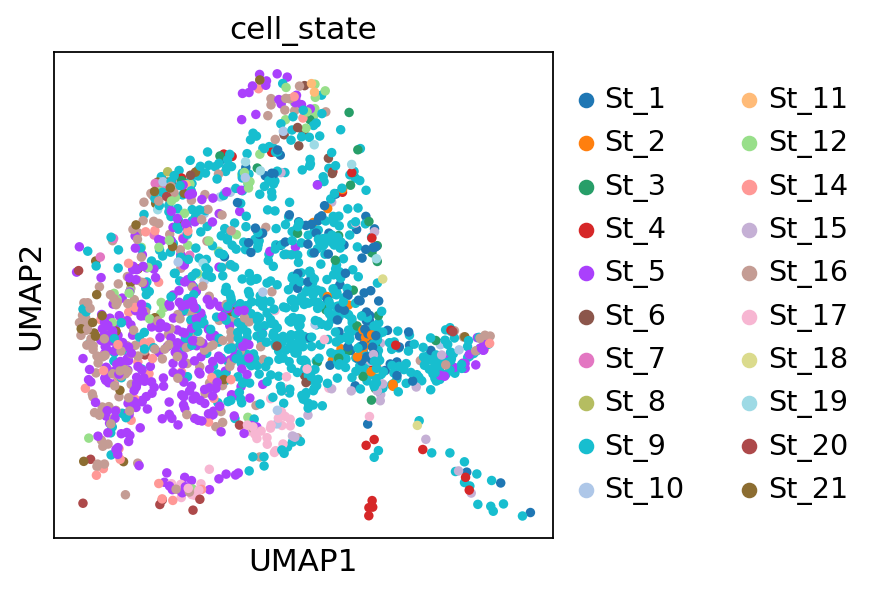

In [19]:
sc.pl.umap(adata_new, color=['cell_state'], save = "UW14R_umap_cellState_all.pdf")

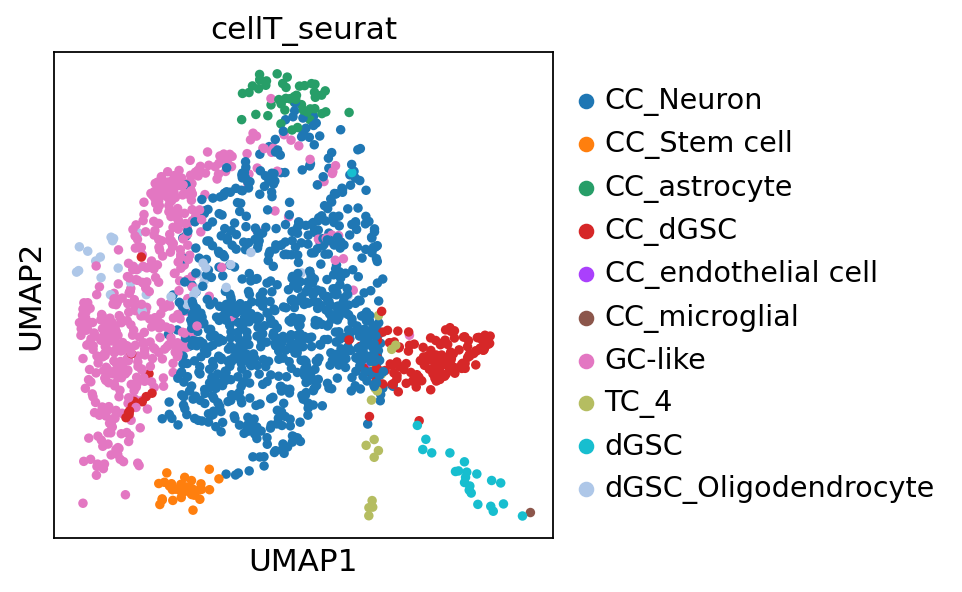

In [20]:
sc.pl.umap(adata_new, color=['cellT_seurat'], save="UW14R_umap_celltype.pdf")

In [21]:
adatastS = adata_new[adata_new.obs['cell_state'].isin(['St_1','St_5', 'St_9','St_16'])]

saving figure to file ./figures/scvelo_UW14R_cellState_subset.pdf


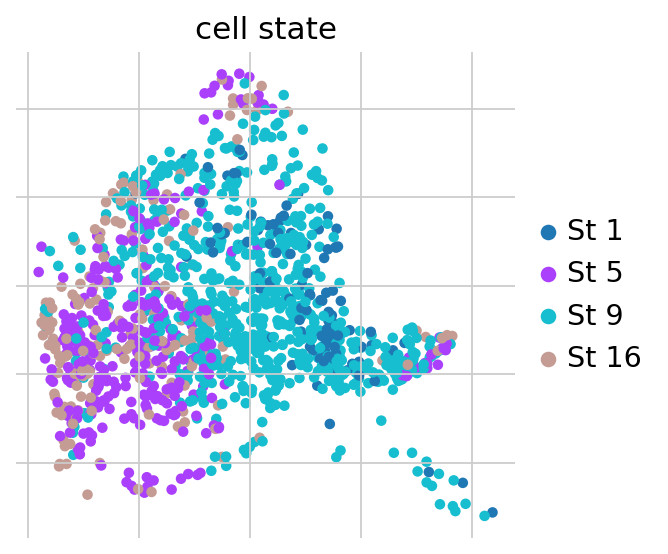

In [22]:
scv.pl.umap(adatastS, color='cell_state', legend_loc = 'right margin', save="UW14R_cellState_subset.pdf")

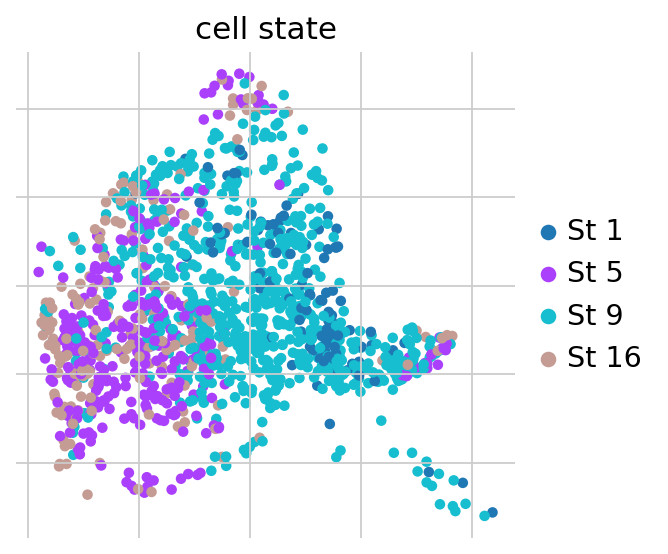

In [ ]:
scv.pl.umap(adatastS, color='cell_state', legend_loc = 'right margin')

In [ ]:
adata_new.obs['cell_state'].value_counts()

cell_state
St_9     703
St_5     330
St_16    190
St_1     107
St_14     46
St_12     45
St_17     38
St_21     29
St_3      28
St_15     23
St_2      21
St_4      21
St_10     20
St_20     13
St_6      11
St_19      8
St_7       7
St_18      3
St_11      3
St_8       1
Name: count, dtype: int64

**Cellrank analysis**

1. Velocity Kernel
2. Cell state probability

In [23]:
import cellrank as cr

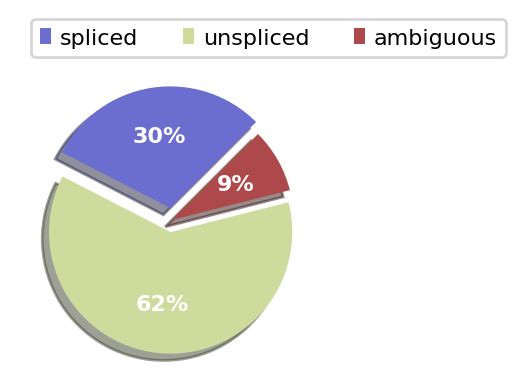

AnnData object with n_obs × n_vars = 3327 × 33538
    obs: 'cellT_seurat', 'Condition', 'cell_state'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [24]:
scv.pl.proportions(adata)
adata

In [25]:
scv.pp.moments(adata_new, n_pcs=30, n_neighbors=30)

Normalized count data: spliced, unspliced.
computing PCA
    with n_comps=30


<ipython-input-25-3756c7387870>:1: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata_new, n_pcs=30, n_neighbors=30)
/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/usr/local/lib/python3.11/dist-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute PCA with Scanpy first.
  _set_pca(adata=adata, n_pcs=n_pcs, use_highly_variable=use_highly_variable)


    finished (0:00:01)
computing neighbors
    finished (0:00:36) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [26]:
scv.tl.recover_dynamics(adata_new, n_jobs=8)

recovering dynamics (using 2/2 cores)


  0%|          | 0/95 [00:00<?, ?gene/s]

    finished (0:00:33) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [27]:
scv.tl.velocity(adata_new, mode="dynamical")

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [28]:
vk = cr.kernels.VelocityKernel(adata_new)
vk.compute_transition_matrix()

Computing transition matrix using `'deterministic'` model


  0%|          | 0/1647 [00:00<?, ?cell/s]

Using `softmax_scale=3.4811`


  0%|          | 0/1647 [00:00<?, ?cell/s]

    Finish (0:00:17)


VelocityKernel[n=1647, model='deterministic', similarity='correlation', softmax_scale=3.481]

In [29]:
##2set
ck = cr.kernels.ConnectivityKernel(adata_new)
ck.compute_transition_matrix()

combined_kernel = 0.8 * vk + 0.2 * ck

Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)


Using precomputed projection `adata.obsm['T_fwd_umap']`


/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

saving figure to file ./figures/scvelo_UW14R_umap_velocity.pdf


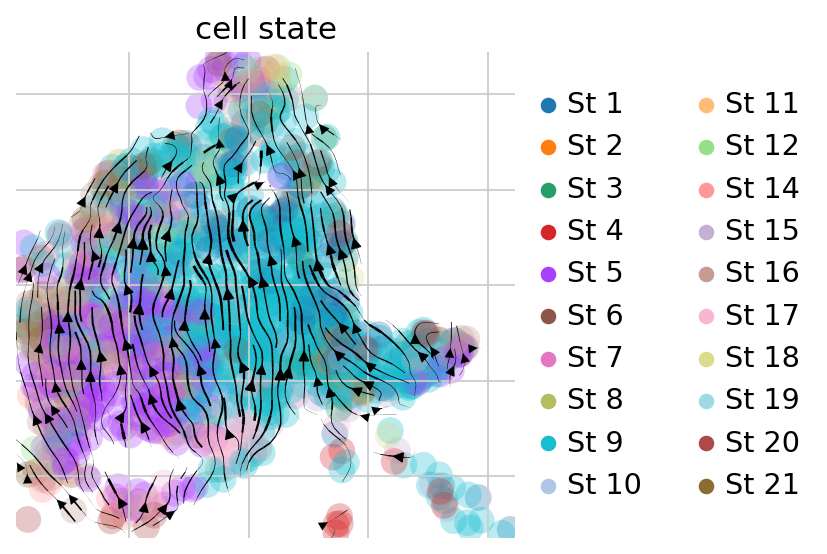

In [31]:
##2set
vk.plot_projection(color="cell_state", legend_loc='right', save = "UW14R_umap_velocity.pdf")

In [32]:
vk.compute_transition_matrix()

Computing transition matrix using `'deterministic'` model


  0%|          | 0/1647 [00:00<?, ?cell/s]

Using `softmax_scale=3.4811`


  0%|          | 0/1647 [00:00<?, ?cell/s]

    Finish (0:00:04)


VelocityKernel[n=1647, model='deterministic', similarity='correlation', softmax_scale=3.481]

Projecting transition matrix onto `umap`
Adding `adata.obsm['T_fwd_umap']`
    Finish (0:00:01)


/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

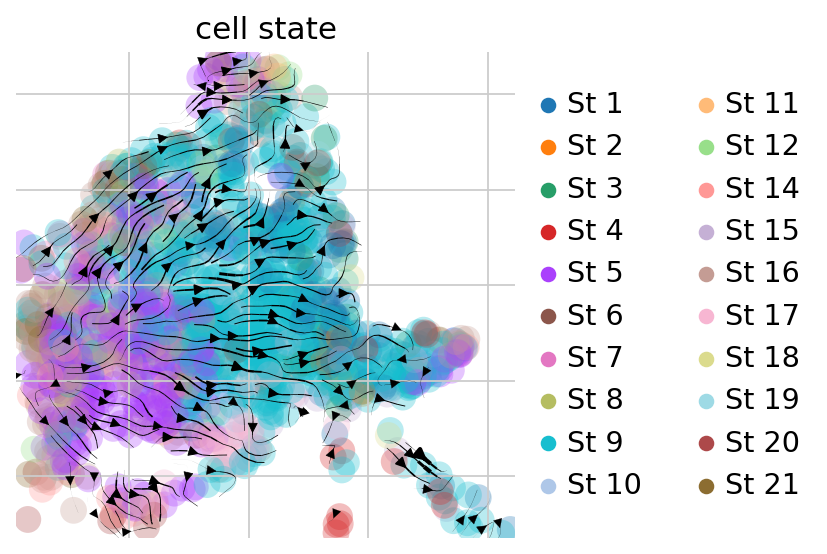

In [36]:
ck.plot_projection(basis="umap", recompute=True, color ='cell_state', legend_loc = 'right margin')

In [38]:
ck = cr.kernels.ConnectivityKernel(adata_new)
ck.compute_transition_matrix()

combined_kernel = 0.8 * vk + 0.2 * ck

Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)


In [39]:
print(combined_kernel)

(0.8 * VelocityKernel[n=1647] + 0.2 * ConnectivityKernel[n=1647])


Using precomputed projection `adata.obsm['T_fwd_umap']`


/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

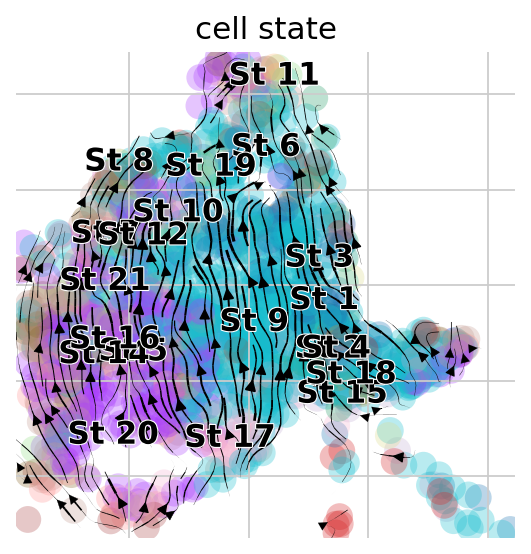

In [35]:
vk.plot_projection(color="cell_state")

Using precomputed projection `adata.obsm['T_fwd_umap']`


/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

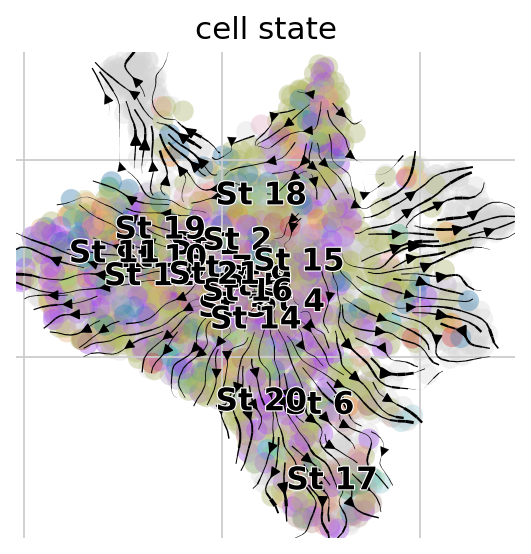

In [ ]:
vk.plot_projection(color="cell_state")

In [40]:
vk.write_to_adata()
adata_new.write(
    "UW14R_scvelocity_kernel_v1_12may2.h5ad", compression="gzip"
)

In [41]:
g = cr.estimators.GPCCA(vk)
print(g)

GPCCA[kernel=VelocityKernel[n=1647], initial_states=None, terminal_states=None]


Computing Schur decomposition
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:09)
Calculating minChi criterion in interval `[3, 7]`
Computing `3` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)


/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

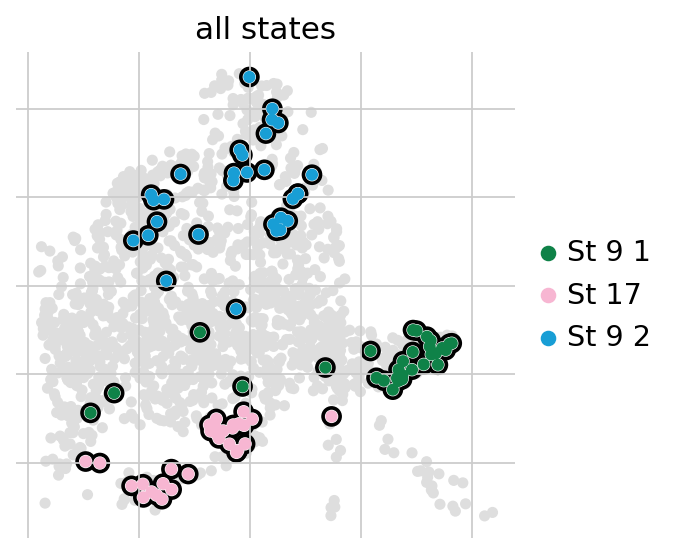

In [43]:
g.fit(cluster_key="cell_state", n_states=[2, 7])
g.plot_macrostates(which="all", discrete=True, legend_loc="right", s=100)

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

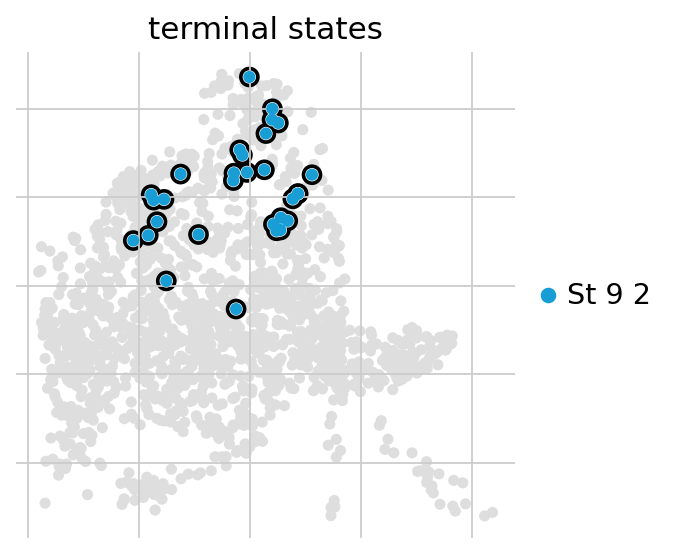

In [44]:
g.predict_terminal_states()
g.plot_macrostates(which="terminal", legend_loc="right", s=100)

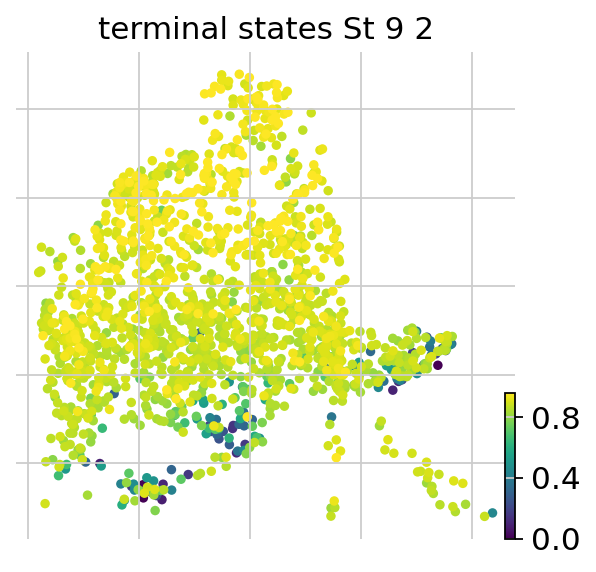

In [45]:
g.plot_macrostates(which="terminal", discrete=False)

In [ ]:
g2 = cr.estimators.GPCCA(vk)
print(g2)

GPCCA[kernel=VelocityKernel[n=1571], initial_states=None, terminal_states=None]


Computing Schur decomposition
When computing macrostates, choose a number of states NOT in `[9, 13, 20]`
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:13)


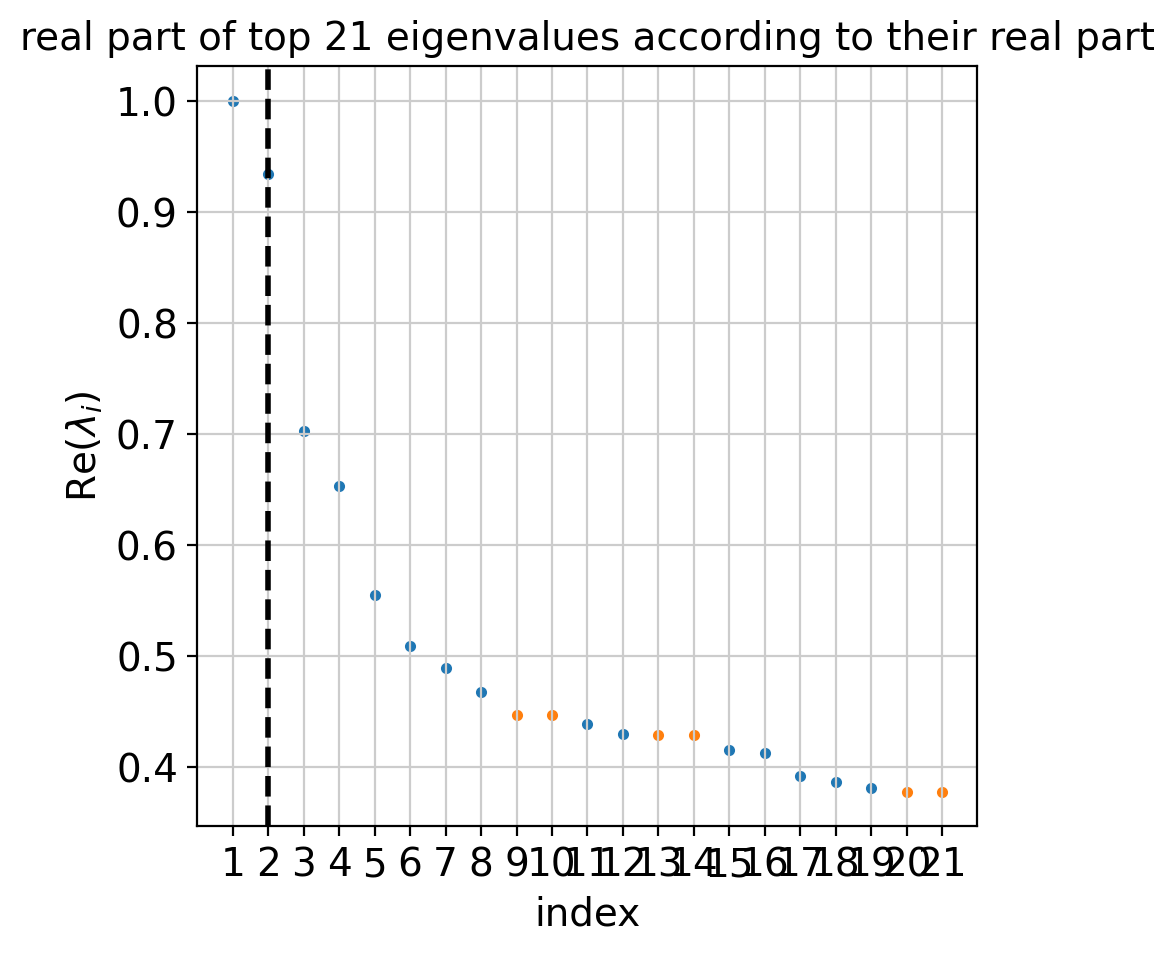

In [ ]:
g2.compute_schur()
g2.plot_spectrum(real_only=True)

Computing `4` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)


/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

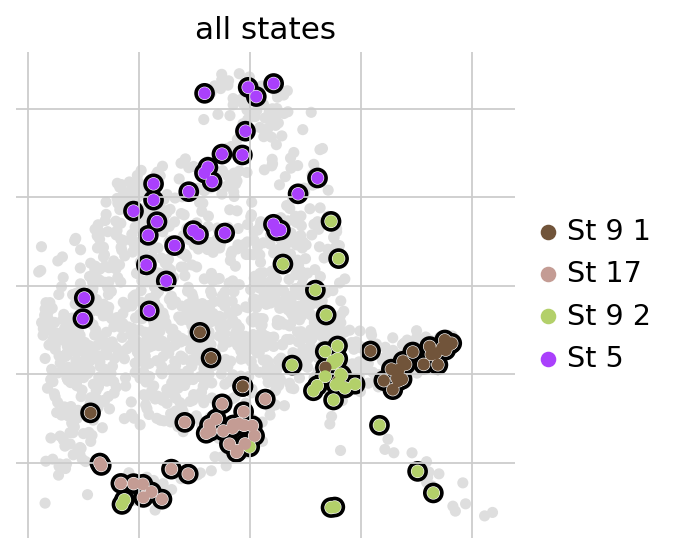

In [ ]:
g2.compute_macrostates(n_states=4, cluster_key="cell_state")
g2.plot_macrostates(which="all", legend_loc="right", s=100)

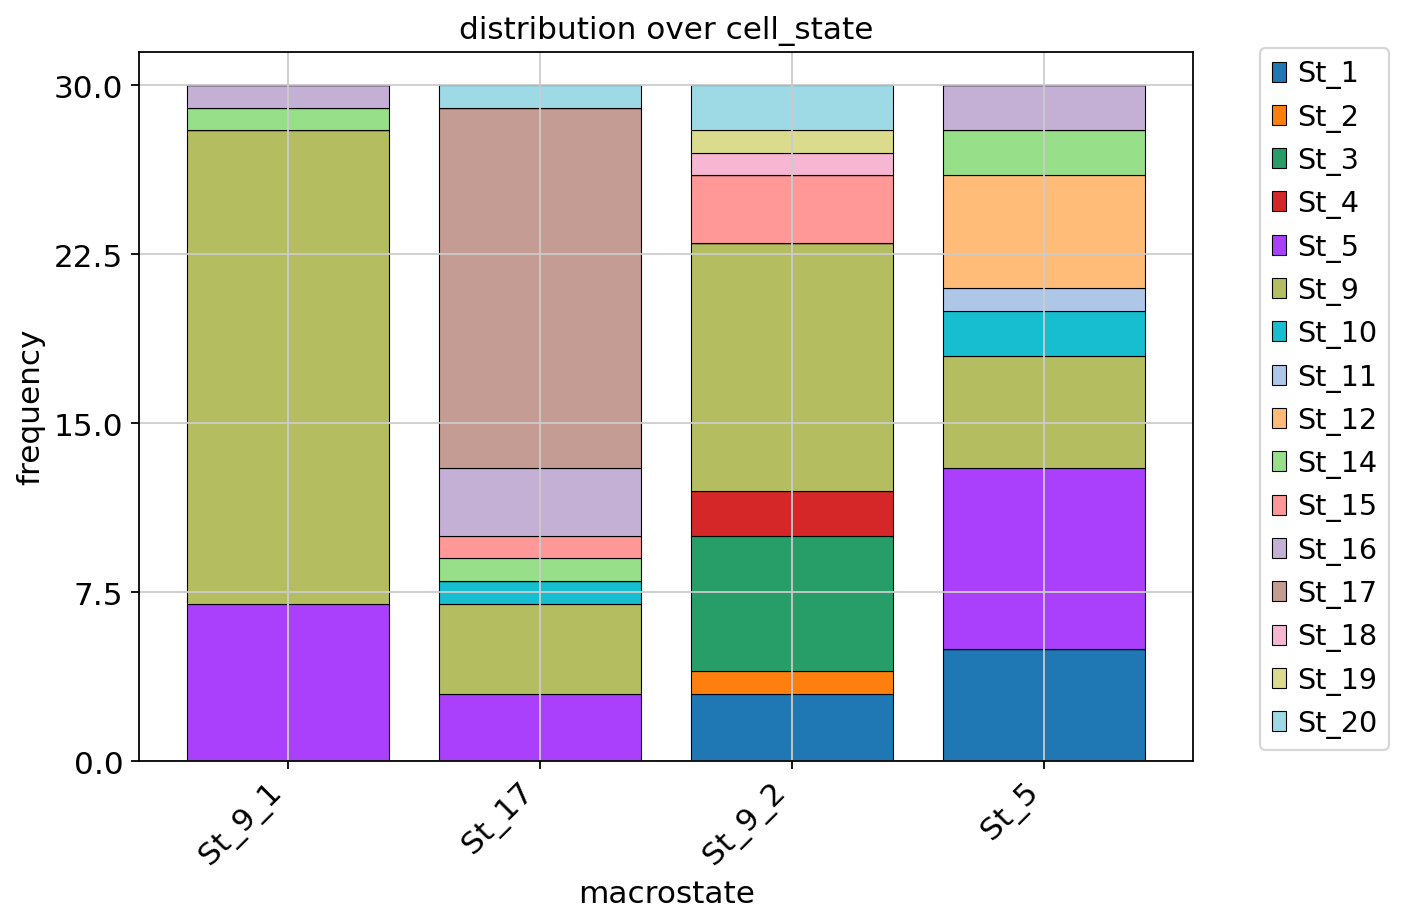

In [ ]:
g2.plot_macrostate_composition(key="cell_state", figsize=(9, 6))

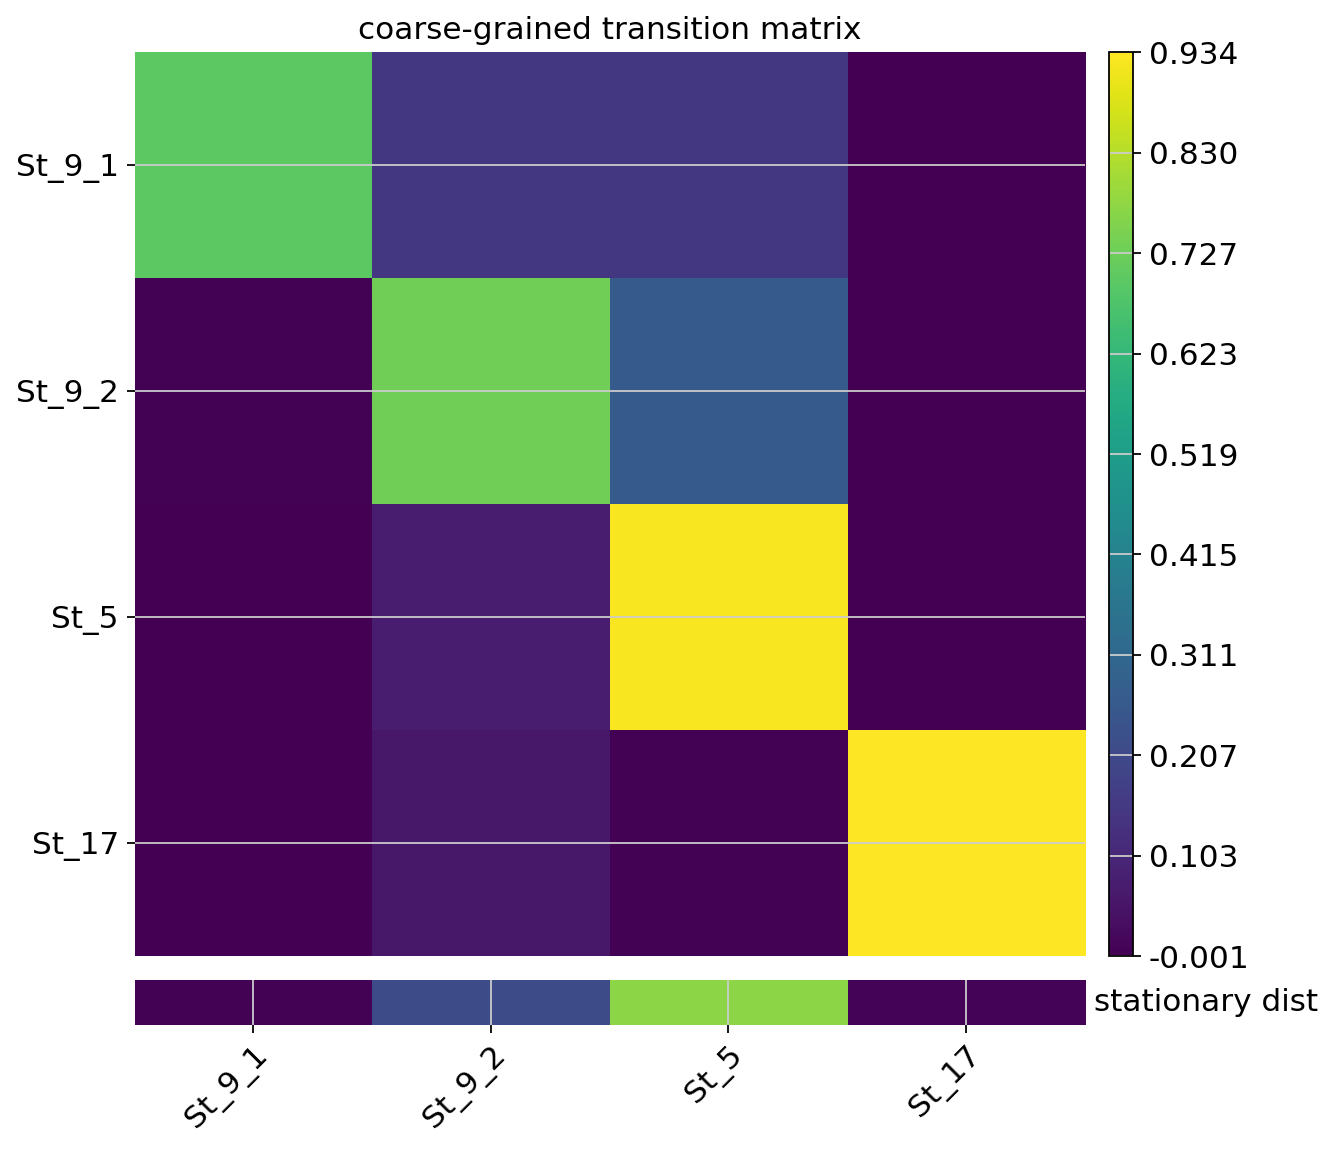

In [ ]:
g2.plot_coarse_T(annotate=False)

In [ ]:
g2.predict_terminal_states()
g2.plot_macrostates(which="terminal", legend_loc="right", s=100)

ValueError: No macrostates have been selected.

Computing Schur decomposition
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:09)
Computing `5` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

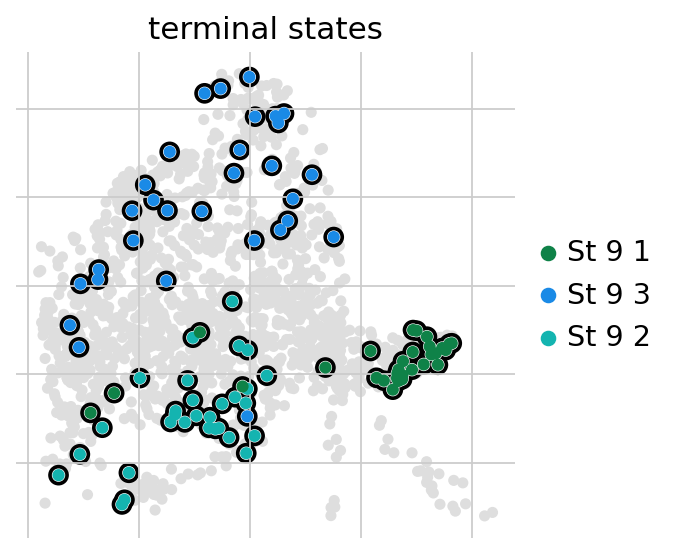

In [47]:
g.fit(cluster_key="cell_state", n_states=5)

g.set_terminal_states(states=['St_9_1', 'St_9_3', 'St_9_2'])
g.plot_macrostates(which="terminal", legend_loc="right", size=100)

Computing fate probabilities
Defaulting to `'gmres'` solver.


  0%|          | 0/3 [00:00<?, ?/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)


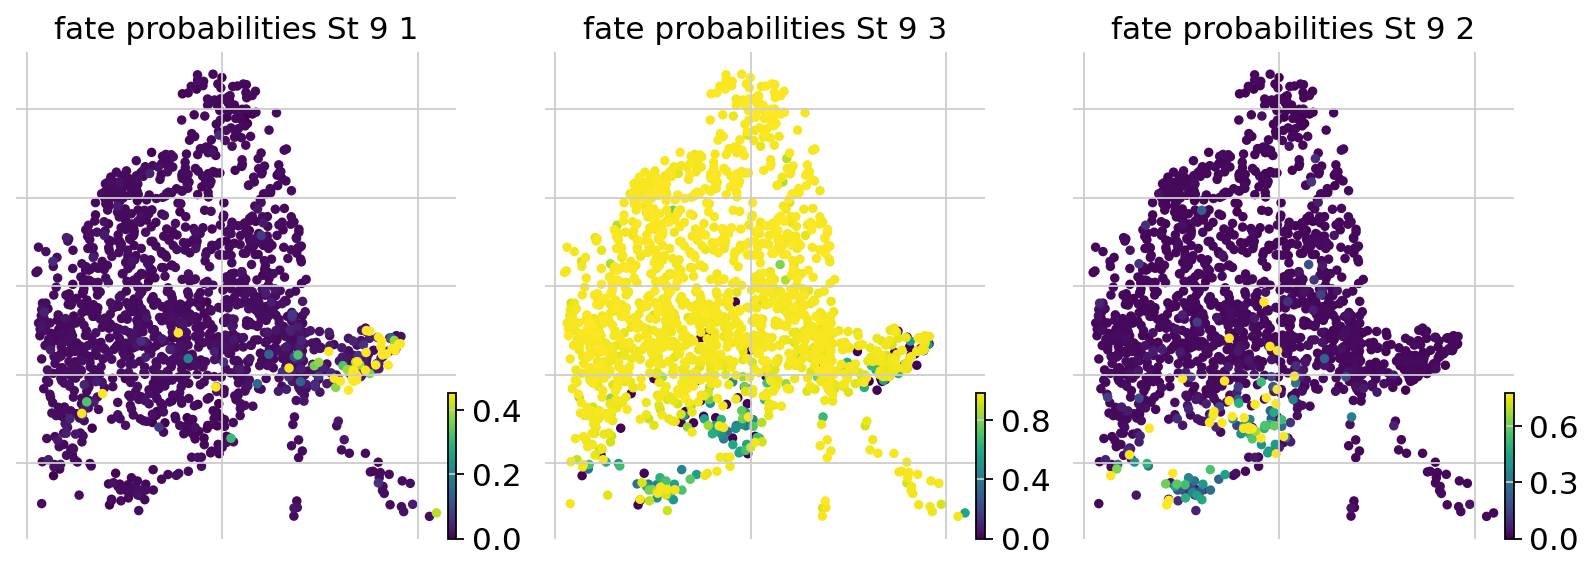

In [48]:
g.compute_fate_probabilities()
g.plot_fate_probabilities(same_plot=False)

/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

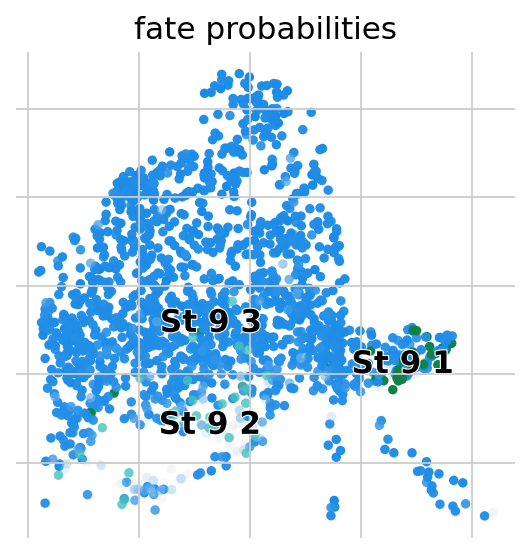

In [49]:
g.plot_fate_probabilities(same_plot=True)

/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/usr/local/lib/python3.11/dist-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and wi

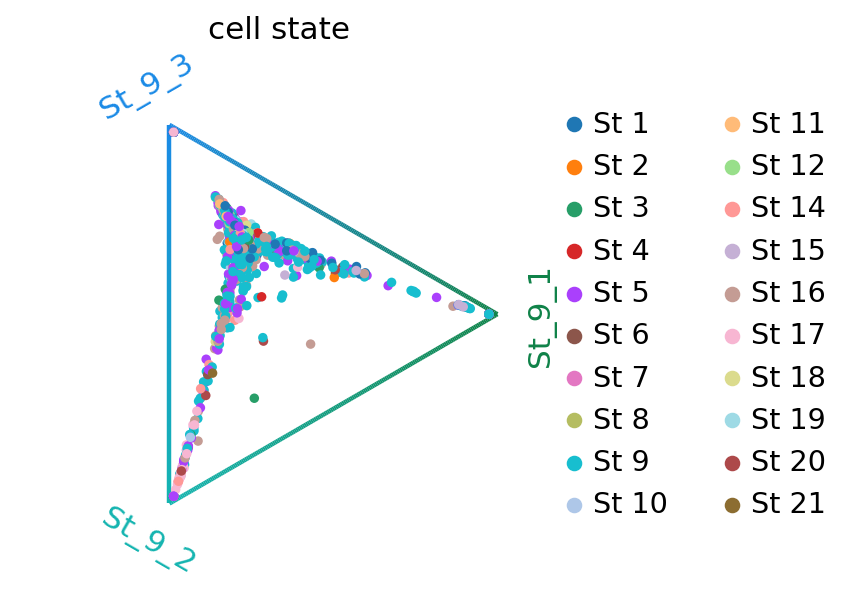

In [50]:
cr.pl.circular_projection(adata_new, keys=["cell_state", "clusters_gradient"], legend_loc="right")

In [51]:
fev_states = [ 'St_5', 'St_1', 'St_17']
#sc.pl.embedding(
#    adata_new, basis="umap", color="cell_state", groups=fev_states, legend_loc="right"
#)

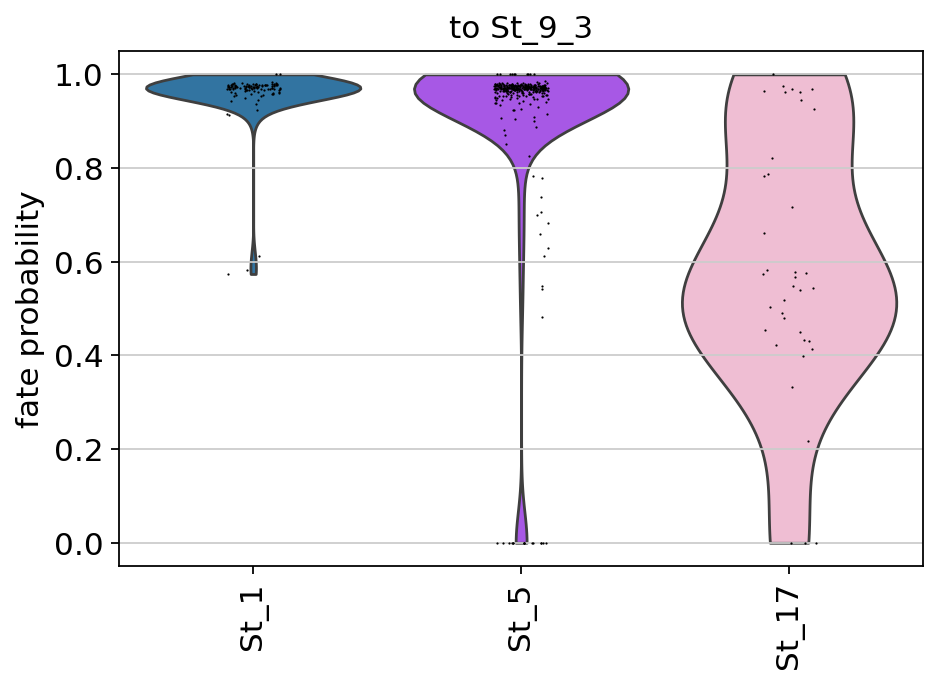

In [52]:
cr.pl.aggregate_fate_probabilities(
    adata_new,
    mode="violin",
    lineages=["St_9_3"],
    cluster_key="cell_state",
    clusters=fev_states,
)

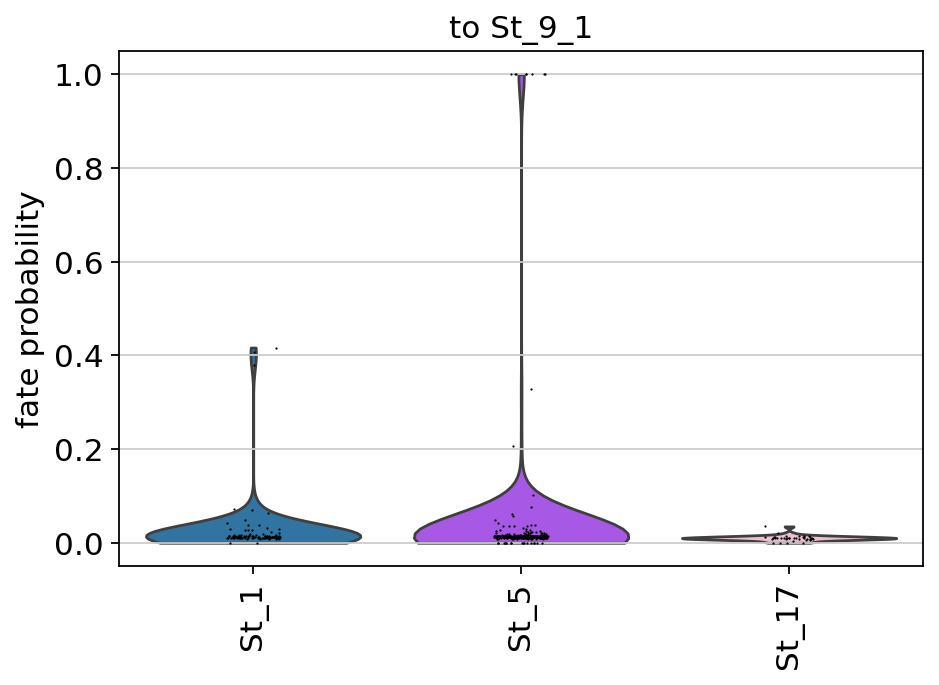

In [54]:
cr.pl.aggregate_fate_probabilities(
    adata_new,
    mode="violin",
    lineages=["St_9_1"],
    cluster_key="cell_state",
    clusters=fev_states,
)

In [55]:
cr.pl.aggregate_fate_probabilities(
    adata,
    mode="violin",
    lineages=["St_9_2"],
    cluster_key="cell_state",
    clusters=fev_states,
)

AttributeError: Can only use .cat accessor with a 'category' dtype

In [56]:
adata_new.obs["fate_probabilities_st9"] = g.fate_probabilities["St_9_3"].X.flatten()

In [57]:
import statistics
adata_S1 = adata_new[adata_new.obs['cell_state'].isin(['St_1'])]

In [59]:
adata_S5 = adata_new[adata_new.obs['cell_state'].isin(['St_5'])]
adata_S17 = adata_new[adata_new.obs['cell_state'].isin(['St_17'])]

In [58]:
statistics.median(adata_S1.obs["fate_probabilities_st9"])

0.9722355073407422

In [61]:
statistics.median(adata_S5.obs["fate_probabilities_st9"])

0.9696679778991856

In [62]:
statistics.median(adata_S17.obs["fate_probabilities_st9"])

0.5575194414657108